Data set link - https://www.kaggle.com/competitions/state-farm-distracted-driver-detection/data

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [4]:
# Label File
pd.read_csv('driver_imgs_list.csv')

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg
...,...,...,...
22419,p081,c9,img_56936.jpg
22420,p081,c9,img_46218.jpg
22421,p081,c9,img_25946.jpg
22422,p081,c9,img_67850.jpg


In [5]:
# Loading ImageDataGenrator
from keras.preprocessing.image import ImageDataGenerator

In [6]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

In [7]:
# Getting Training Genrator 
train_gen=imageGen.flow_from_directory(
    'imgs/train',
    batch_size=32,
    target_size=(100,100),
    class_mode = 'categorical',
)

Found 22424 images belonging to 10 classes.


In [8]:
# Making our CNN Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.models import Sequential
model = Sequential([
    Conv2D(32,(3,3),activation="relu",input_shape =(100,100,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(512,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              34669568  
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5

In [9]:
# Fitting our model
model.fit_generator(train_gen,epochs=5)

c:\Program Files\Python36\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
701/701 [==============================] - 202s 287ms/step - loss: 0.3803 - accuracy: 0.8786
Epoch 2/5
701/701 [==============================] - 184s 262ms/step - loss: 0.0348 - accuracy: 0.9899
Epoch 3/5
701/701 [==============================] - 173s 246ms/step - loss: 0.0191 - accuracy: 0.9945
Epoch 4/5
701/701 [==============================] - 177s 252ms/step - loss: 0.0259 - accuracy: 0.9934
Epoch 5/5
701/701 [==============================] - 176s 251ms/step - loss: 0.0178 - accuracy: 0.9953


In [10]:
# Making an object of ImageData Genrator
imageGen = ImageDataGenerator(rescale=1.0/255)

In [11]:
# Making a test directory in output folder ( that can be readable and writeable )
import os
os.mkdir('test')
os.mkdir('test/all_classes')

In [12]:
# Importing copyfile so copy the testing images from the input test folder to ouput test folder
from shutil import copyfile

In [13]:
# Copying from the input test folder to ouput test folder
d = pd.read_csv('sample_submission.csv')
for row in d.values:
    file_name = row[0]
    copyfile( 'imgs/test/'+file_name , 'test/all_classes/'+file_name )

In [14]:
# Getting Testing Genrator 
test_gen=imageGen.flow_from_directory(
    'test',
    class_mode=None,
    shuffle=False,
    target_size=(100,100),
)

Found 79726 images belonging to 1 classes.


In [15]:
from tensorflow.keras.models import Model
model.save('CNN.h5')

In [16]:
from keras.models import load_model
model = load_model('CNN.h5')

In [17]:
# Predicting from test Genrator 
test_gen.reset()
predictions = model.predict_generator(test_gen,verbose=1)

c:\Program Files\Python36\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


2492/2492 [==============================] - 506s 203ms/step


In [18]:
# Checking the shape of prediction
predictions.shape

(79726, 10)

In [19]:
# Converting the Prediction same as sample submission dataFrame
# Making the dictionary of The Predcition
d1 = pd.read_csv('sample_submission.csv')
d ={
    'img':list(d1.values[:,0]),
}
for i in range(0,10):
    d['c' + str(i)] = list(predictions[:,i])
d

{'img': ['img_1.jpg',
  'img_10.jpg',
  'img_100.jpg',
  'img_1000.jpg',
  'img_100000.jpg',
  'img_100001.jpg',
  'img_100002.jpg',
  'img_100003.jpg',
  'img_100004.jpg',
  'img_100005.jpg',
  'img_100007.jpg',
  'img_100008.jpg',
  'img_100009.jpg',
  'img_10001.jpg',
  'img_100010.jpg',
  'img_100011.jpg',
  'img_100012.jpg',
  'img_100013.jpg',
  'img_100014.jpg',
  'img_100016.jpg',
  'img_100017.jpg',
  'img_100018.jpg',
  'img_100019.jpg',
  'img_10002.jpg',
  'img_100020.jpg',
  'img_100022.jpg',
  'img_100023.jpg',
  'img_100024.jpg',
  'img_100025.jpg',
  'img_100028.jpg',
  'img_100030.jpg',
  'img_100031.jpg',
  'img_100032.jpg',
  'img_100033.jpg',
  'img_100034.jpg',
  'img_100035.jpg',
  'img_100037.jpg',
  'img_100038.jpg',
  'img_100039.jpg',
  'img_10004.jpg',
  'img_100040.jpg',
  'img_100042.jpg',
  'img_100043.jpg',
  'img_100044.jpg',
  'img_100047.jpg',
  'img_100049.jpg',
  'img_10005.jpg',
  'img_100051.jpg',
  'img_100052.jpg',
  'img_100053.jpg',
  'img_1000

In [20]:
# Converting the Prediction to DataFrame
df = pd.DataFrame(d)
df

,img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,img_1.jpg,4.427608e-08,3.151699e-11,3.581825e-09,1.588398e-12,1.813705e-10,1.000000e+00,1.369676e-13,4.554112e-09,4.158196e-11,2.178326e-08
1,img_10.jpg,2.731017e-02,9.934588e-05,1.814596e-04,3.235942e-01,1.774427e-05,6.487010e-01,2.263020e-06,3.021191e-08,4.460969e-05,4.928721e-05
2,img_100.jpg,4.116139e-01,5.687060e-02,4.872760e-01,4.966017e-04,7.488353e-03,6.634284e-04,2.589519e-04,4.971319e-04,3.410344e-02,7.316846e-04
3,img_1000.jpg,1.258315e-02,2.390989e-03,1.331356e-03,6.361909e-03,4.991874e-04,1.583697e-04,7.511218e-01,1.308690e-05,2.255232e-01,1.693392e-05
4,img_100000.jpg,7.587369e-05,6.280624e-09,3.250512e-07,9.725516e-05,3.483900e-03,9.504526e-04,1.420102e-06,2.424296e-07,9.931486e-01,2.241922e-03
...,...,...,...,...,...,...,...,...,...,...,...
79721,img_99994.jpg,3.618524e-02,3.909746e-05,3.270002e-03,7.258823e-08,2.393782e-05,6.436539e-03,8.537139e-03,4.489323e-01,4.965367e-01,3.902650e-05
79722,img_99995.jpg,8.590698e-03,3.239517e-03,9.867904e-06,7.750668e-02,1.316122e-02,7.999935e-04,9.295712e-04,8.720133e-05,9.301560e-04,8.947451e-01
79723,img_99996.jpg,1.996518e-03,1.064100e-04,1.804119e-02,6.847293e-05,3.249042e-03,3.145467e-05,7.828619e-03,9.439240e-05,9.685764e-01,7.459590e-06
79724,img_99998.jpg,2.314674e-09,7.911636e-11,1.030837e-06,5.680810e-13,9.743574e-10,4.633786e-08,9.999902e-01,1.173709e-06,7.463095e-06,2.648686e-11


In [21]:
# Converting DataFrame into CSV File
df.to_csv('Prediction.csv',index=False)

In [22]:
# c0: safe driving
# c1: texting - right
# c2: talking on the phone - right
# c3: texting - left
# c4: talking on the phone - left
# c5: operating the radio
# c6: drinking
# c7: reaching behind
# c8: hair and makeup
# c9: talking to passenger

In [23]:
# Getting Classes from Predictions
predicted_class_indices=np.argmax(predictions,axis=1)
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions_in_class = [labels[k] for k in predicted_class_indices]

In [24]:
filenames=test_gen.filenames
file=[]
for f in filenames:
    file.append(f.split('/')[0])
results=pd.DataFrame({"Filename":file ,
                      "Predictions":predictions_in_class})
results

,Filename,Predictions
0,all_classes\img_1.jpg,c5
1,all_classes\img_10.jpg,c5
2,all_classes\img_100.jpg,c2
3,all_classes\img_1000.jpg,c6
4,all_classes\img_100000.jpg,c8
...,...,...
79721,all_classes\img_99994.jpg,c8
79722,all_classes\img_99995.jpg,c9
79723,all_classes\img_99996.jpg,c8
79724,all_classes\img_99998.jpg,c6


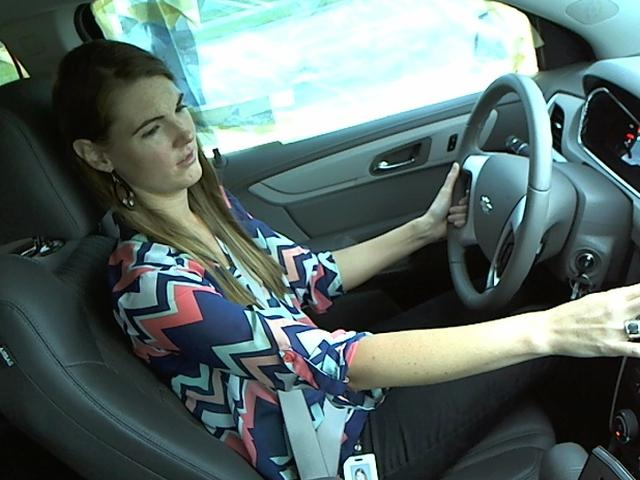

In [25]:
# Random Image of Testing Data
from IPython.display import Image
Image(filename=r'C:\Users\YMTS0513\Downloads\Distracted Driver Detection\test\all_classes\img_100012.jpg') 

In [36]:
# Choose entries with id p01
df_new = results[results['Filename'] =='all_classes\img_100012.jpg']
print(df_new)

                      Filename Predictions
16  all_classes\img_100012.jpg          c5


In [37]:
df_new.iat[0,1]

'c5'

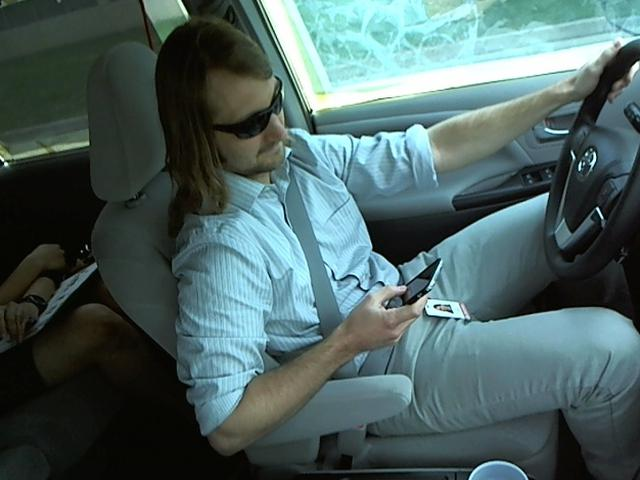

In [27]:
# Random Image of Testing Data
from IPython.display import Image
Image(filename=r'C:\Users\YMTS0513\Downloads\Distracted Driver Detection\test\all_classes\img_99994.jpg') 

In [28]:
df_new1 = results[results['Filename'] == 'all_classes\img_100004.jpg']
print(df_new1)

                     Filename Predictions
8  all_classes\img_100004.jpg          c6


In [29]:
# Predicting the class of Image
print(results.loc[results['Filename'] == r'C:\Users\YMTS0513\Downloads\Distracted Driver Detection\test\all_classes\img_99994.jpg'])
# c6 => drinking

Empty DataFrame
Columns: [Filename, Predictions]
Index: []


In [30]:
results

,Filename,Predictions
0,all_classes\img_1.jpg,c5
1,all_classes\img_10.jpg,c5
2,all_classes\img_100.jpg,c2
3,all_classes\img_1000.jpg,c6
4,all_classes\img_100000.jpg,c8
...,...,...
79721,all_classes\img_99994.jpg,c8
79722,all_classes\img_99995.jpg,c9
79723,all_classes\img_99996.jpg,c8
79724,all_classes\img_99998.jpg,c6


In [31]:
results['Filename']

0             all_classes\img_1.jpg
1            all_classes\img_10.jpg
2           all_classes\img_100.jpg
3          all_classes\img_1000.jpg
4        all_classes\img_100000.jpg
                    ...            
79721     all_classes\img_99994.jpg
79722     all_classes\img_99995.jpg
79723     all_classes\img_99996.jpg
79724     all_classes\img_99998.jpg
79725     all_classes\img_99999.jpg
Name: Filename, Length: 79726, dtype: object